### Problem Statement

    Identify products at risk of backorder before the event occurs so the business has time to react. 

### Data Preprocessing


In [1]:
# Loading libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras import optimizers

import matplotlib.pyplot as plt
%matplotlib inline  
import os

/home/gaurang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Load the data

In [2]:
os.getcwd()

'/home/gaurang/Gaurang/practice/AI/Classification_BackOrders'

In [3]:
#For setting working directory, if required
#os.chdir('path to file)

In [3]:
data = pd.read_csv("../../datasets/BackOrders.csv",header=0)

#### Data Understanding

See the number row and columns

In [4]:
data.shape

(61589, 23)

Display the columns

In [5]:
data.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

Display the index

In [6]:
data.index

RangeIndex(start=0, stop=61589, step=1)

See the top rows of the data

In [7]:
data[:3]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No


In [8]:
data.describe(include='all')

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,6.158900e+04,61589.000000,58186.000000,61589.000000,6.158900e+04,6.158900e+04,6.158900e+04,61589.000000,61589.000000,6.158900e+04,...,61589.000000,61589.000000,61589.000000,61589.000000,61589,61589,61589,61589,61589,61589
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,No,No,Yes,No,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48145,61577,53792,59303,61569,50296
mean,2.037188e+06,287.721882,7.559619,30.192843,1.692728e+02,3.150413e+02,4.535760e+02,44.742957,150.732631,2.835465e+02,...,1.605400,-6.264182,-5.863664,1.205361,NaN,NaN,NaN,NaN,NaN,NaN
std,6.564178e+05,4233.906931,6.498952,792.869253,5.286742e+03,9.774362e+03,1.420201e+04,1373.805831,5224.959649,8.872270e+03,...,42.309229,25.537906,24.844514,29.981155,NaN,NaN,NaN,NaN,NaN,NaN
min,1.068628e+06,-2999.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,-99.000000,-99.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.498574e+06,3.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.620000,0.640000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.898033e+06,10.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000,4.000000e+00,...,0.000000,0.820000,0.800000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.314826e+06,57.000000,8.000000,0.000000,1.200000e+01,2.500000e+01,3.600000e+01,6.000000,17.000000,3.400000e+01,...,0.000000,0.960000,0.950000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


Display data type of each variable

In [9]:
data.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

Let's convert the columns to proper datatypes.


In [10]:
for col in ['sku', 'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']:
    data[col] = data[col].astype('category')

Display data type of each variable

In [11]:
data.dtypes

sku                  category
national_inv            int64
lead_time             float64
in_transit_qty          int64
forecast_3_month        int64
forecast_6_month        int64
forecast_9_month        int64
sales_1_month           int64
sales_3_month           int64
sales_6_month           int64
sales_9_month           int64
min_bank                int64
potential_issue      category
pieces_past_due         int64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty            int64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
went_on_backorder    category
dtype: object

##### Delete sku attribute

In [12]:
np.size(np.unique(data.sku))

61589

In [13]:
data.drop('sku', axis=1, inplace=True)

#### Missing Data

Missing value analysis and dropping the records with missing values

In [14]:
data.isnull().sum()

national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

Observing the number of records before and after missing value records removal

In [15]:
print (data.shape)

(61589, 22)


In [16]:
#Since the number of missing values is about 5%. For initial analysis we ignore all these records
data = data.dropna(axis=0)

In [17]:
print(data.isnull().sum())
print("----------------------------------")
print(data.shape)

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64
----------------------------------
(58186, 22)


#### Converting Categorical to Numeric

In [18]:
print (data.columns)

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')


##### Creating dummy variables.

In [19]:
categorical_Attributes = data.select_dtypes(include=['category']).columns

In [20]:
data = pd.get_dummies(columns=categorical_Attributes, data=data, prefix=categorical_Attributes, prefix_sep="_",drop_first=True)

In [21]:
print (data.columns, data.shape)

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'potential_issue_Yes', 'deck_risk_Yes',
       'oe_constraint_Yes', 'ppap_risk_Yes', 'stop_auto_buy_Yes',
       'rev_stop_Yes', 'went_on_backorder_Yes'],
      dtype='object') (58186, 22)


#### Target attribute distribution

In [22]:
pd.value_counts(data['went_on_backorder_Yes'])

0    47217
1    10969
Name: went_on_backorder_Yes, dtype: int64

#### Train-Test Split

In [24]:
#Performing train test split on the data
X, y = data.loc[:,data.columns!='went_on_backorder_Yes'].values, data.loc[:,'went_on_backorder_Yes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify = data['went_on_backorder_Yes'])


In [25]:
#To get the distribution in the target in train and test
print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

0    33052
1     7678
dtype: int64
0    14165
1     3291
dtype: int64


##### Building a logistic regression model using sklearn as base model for reference 

In [26]:
classifier = LogisticRegression(random_state=123)

In [27]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Predictions

In [28]:
# Predictions on train data
train_pred = classifier.predict(X_train)
# Predictions on test data
test_pred = classifier.predict(X_test)

##### Confusion Matrix

In [29]:
# Train data
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print("Confusion Matrix - Train Data: \n", confusion_matrix_train)
# Test data
confusion_matrix_test= confusion_matrix(y_test, test_pred)
print("Confusion Matrix - Test Data: \n", confusion_matrix_test)

Confusion Matrix - Train Data: 
 [[32880   172]
 [ 7094   584]]
Confusion Matrix - Test Data: 
 [[14101    64]
 [ 3029   262]]


##### Error Metrics

In [30]:
# Metrics on train data for logistic regression model
#Accuracy
accuracy_Train_logReg = (confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
#specificity or true negative rate (TNR)
specificity_Train_logReg = confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
#sensitivity, recall, hit rate, or true positive rate (TPR)
recall_Train_logReg = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
#precision
precision_Train_logReg = confusion_matrix_train[1,1]/(confusion_matrix_train[0,1]+confusion_matrix_train[1,1])

print("Train Specificity: ",specificity_Train_logReg)
print("Train Recall: ",recall_Train_logReg)
print("Train Precision: ",precision_Train_logReg)
print("Train Accuracy: ",accuracy_Train_logReg)

Train Specificity:  0.9947960789059663
Train Recall:  0.07606147434227663
Train Precision:  0.7724867724867724
Train Accuracy:  0.8216056960471397


In [31]:
# Metrics on test data
#Accuracy
accuracy_Test_logReg = (confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
#specificity or true negative rate (TNR)
specificity_Test_logReg = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
#sensitivity, recall, hit rate, or true positive rate (TPR)
recall_Test_logReg = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
#precision
precision_Test_logReg = confusion_matrix_test[1,1]/(confusion_matrix_test[0,1]+confusion_matrix_test[1,1])

print("Test Specificity: ",specificity_Test_logReg)
print("Test Recall: ",recall_Test_logReg)
print("Test Precision: ",precision_Test_logReg)
print("Test Accuracy: ",accuracy_Test_logReg)

Test Specificity:  0.9954818213907518
Test Recall:  0.07961106046794288
Test Precision:  0.803680981595092
Test Accuracy:  0.8228116406966086


In [32]:
y_train.shape


(40730,)

## ANN Model Building

#### A. Base model


In [39]:
perceptron_model = Sequential()

perceptron_model.add(Dense(1, input_dim=21, activation='sigmoid', kernel_initializer='normal'))

In [40]:
perceptron_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
perceptron_model.fit(X_train, y_train, epochs=30, batch_size=64)

Epoch 1/30
40730/40730 [==============================] - 1s 16us/step - loss: 0.5000 - acc: 0.8293
Epoch 2/30
40730/40730 [==============================] - 0s 11us/step - loss: 0.4187 - acc: 0.8436
Epoch 3/30
40730/40730 [==============================] - 0s 11us/step - loss: 0.4655 - acc: 0.8459
Epoch 4/30
40730/40730 [==============================] - 0s 12us/step - loss: 0.5268 - acc: 0.8461
Epoch 5/30
40730/40730 [==============================] - 0s 11us/step - loss: 0.4024 - acc: 0.8567
Epoch 6/30
40730/40730 [==============================] - 0s 11us/step - loss: 0.4012 - acc: 0.8581
Epoch 7/30
40730/40730 [==============================] - 0s 11us/step - loss: 0.4035 - acc: 0.8575
Epoch 8/30
40730/40730 [==============================] - 0s 12us/step - loss: 0.4000 - acc: 0.8602
Epoch 9/30
40730/40730 [==============================] - 0s 11us/step - loss: 0.3963 - acc: 0.8599
Epoch 10/30
40730/40730 [==============================] - 0s 12us/step - loss: 0.4495 - acc: 0.8602

##### Predictions

In [42]:
test_pred=perceptron_model.predict_classes(X_test)
train_pred=perceptron_model.predict_classes(X_train)

confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)



[[32202   850]
 [ 4478  3200]]
[[13778   387]
 [ 1936  1355]]


##### Train Test Accuracy, True Negative Rate and True Positive Rate

In [43]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)
print("-----------------------")

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Train TNR:  0.9742829480818105
Train TPR:  0.4167752018754884
Train Accuracy:  0.8691873312054996
-----------------------
Test TNR:  0.9726791387222026
Test TPR:  0.4117289577635977
Test Accuracy:  0.8669225481209899


#### Adding a hidden layer

In [44]:
mlp_model = Sequential()

mlp_model.add(Dense(12, input_dim=21, activation='relu', kernel_initializer='normal'))
mlp_model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

In [45]:
mlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
#model_history = ann_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)
model_history = mlp_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

Train on 32584 samples, validate on 8146 samples
Epoch 1/30
32584/32584 [==============================] - 1s 23us/step - loss: 0.4369 - acc: 0.8079 - val_loss: 0.3589 - val_acc: 0.8413
Epoch 2/30
32584/32584 [==============================] - 0s 15us/step - loss: 0.3232 - acc: 0.8657 - val_loss: 0.3133 - val_acc: 0.8905
Epoch 3/30
32584/32584 [==============================] - 0s 14us/step - loss: 0.3082 - acc: 0.8829 - val_loss: 0.3066 - val_acc: 0.8830
Epoch 4/30
32584/32584 [==============================] - 0s 14us/step - loss: 0.2984 - acc: 0.8848 - val_loss: 0.3053 - val_acc: 0.8896
Epoch 5/30
32584/32584 [==============================] - 0s 14us/step - loss: 0.2925 - acc: 0.8890 - val_loss: 0.2991 - val_acc: 0.8945
Epoch 6/30
32584/32584 [==============================] - 0s 14us/step - loss: 0.2846 - acc: 0.8937 - val_loss: 0.2977 - val_acc: 0.8923
Epoch 7/30
32584/32584 [==============================] - 0s 15us/step - loss: 0.2844 - acc: 0.8935 - val_loss: 0.2896 - val_acc:

#### Predictions

In [47]:
train_pred = mlp_model.predict_classes(X_train)

test_pred = mlp_model.predict_classes(X_test)

#### Getting evaluation metrics and evaluating model performance

In [48]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
confusion_matrix_test = confusion_matrix(y_test, test_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[31281  1771]
 [ 2129  5549]]
[[13371   794]
 [  954  2337]]


#### Calculate Accuracy, True Positive Rate and True Negative Rates

In [49]:
# Metrics on train data for ann_model 1
#Accuracy
accuracy_Train_M1 = (confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
#specificity or true negative rate (TNR)
specificity_Train_M1 = confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
#sensitivity, recall, hit rate, or true positive rate (TPR)
recall_Train_M1 = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
#precision
precision_Train_M1 = confusion_matrix_train[1,1]/(confusion_matrix_train[0,1]+confusion_matrix_train[1,1])

print("Train Specificity: ",specificity_Train_M1)
print("Train Recall: ",recall_Train_M1)
print("Train Precision: ",precision_Train_M1)
print("Train Accuracy: ",accuracy_Train_M1)

Train Specificity:  0.9464177659445722
Train Recall:  0.7227142485022141
Train Precision:  0.7580601092896175
Train Accuracy:  0.9042474834274491


In [50]:
# Metrics on test data
#Accuracy
accuracy_Test_M1 = (confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
#specificity or true negative rate (TNR)
specificity_Test_M1 = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
#sensitivity, recall, hit rate, or true positive rate (TPR)
recall_Test_M1 = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
#precision
precision_Test_M1 = confusion_matrix_test[1,1]/(confusion_matrix_test[0,1]+confusion_matrix_test[1,1])

print("Test Specificity: ",specificity_Test_M1)
print("Test Recall: ",recall_Test_M1)
print("Test Precision: ",precision_Test_M1)
print("Test Accuracy: ",accuracy_Test_M1)

Test Specificity:  0.9439463466290152
Test Recall:  0.7101185050136737
Test Precision:  0.7464068987543916
Test Accuracy:  0.8998625114573785


##### Plot

In [51]:
print(model_history.history.keys())


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


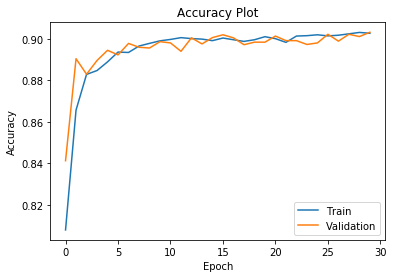

In [52]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

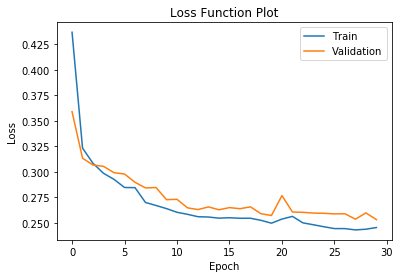

In [53]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### Experimenting with Hidden Layers

We have to be careful about overfitting!!!

In [54]:
ann_model_hiddenExp = Sequential()

# Adding more hidden layers
ann_model_hiddenExp.add(Dense(1000, input_dim=21, activation='sigmoid', kernel_initializer='normal'))
ann_model_hiddenExp.add(Dense(500, activation='sigmoid', kernel_initializer='normal'))
ann_model_hiddenExp.add(Dense(100, activation='sigmoid', kernel_initializer='normal'))
ann_model_hiddenExp.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

ann_model_hiddenExp.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

ann_model_hiddenExp.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Predictions
train_pred = ann_model_hiddenExp.predict_classes(X_train)
test_pred = ann_model_hiddenExp.predict_classes(X_test)

#Evaluation metrics
confusion_matrix_train = confusion_matrix(y_train, train_pred)
confusion_matrix_test = confusion_matrix(y_test, test_pred)

print("Confusion matrices:")
print("---------------------")
print("Confusion matrix - Train:")
print(confusion_matrix_train)
print("Confusion matrix - Test:")
print(confusion_matrix_test)
print("---------------------")

# Metrics on train data
#Accuracy
accuracy_Train_hiddenExp = (confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
#specificity or true negative rate (TNR)
specificity_Train_hiddenExp = confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
#sensitivity, recall, hit rate, or true positive rate (TPR)
recall_Train_hiddenExp = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
#precision
precision_Train_hiddenExp = confusion_matrix_train[1,1]/(confusion_matrix_train[0,1]+confusion_matrix_train[1,1])

print("Evaluation metrics on train data for new model:")
print("------------------------------------")
print("Train Specificity: ",specificity_Train_hiddenExp)
print("Train Recall: ",recall_Train_hiddenExp)
print("Train Precision: ",precision_Train_hiddenExp)
print("Train Accuracy: ",accuracy_Train_hiddenExp)
print("------------------------------------")

print("Evaluation metrics on train data for model 1:")
print("Train Specificity: ",specificity_Train_M1)
print("Train Recall: ",recall_Train_M1)
print("Train Precision: ",precision_Train_M1)
print("Train Accuracy: ",accuracy_Train_M1)
print("------------------------------------")
print("------------------------------------")

# Metrics on test data
#Accuracy
accuracy_Test_hiddenExp = (confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
#specificity or true negative rate (TNR)
specificity_Test_hiddenExp = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
#sensitivity, recall, hit rate, or true positive rate (TPR)
recall_Test_hiddenExp = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
#precision
precision_Test_hiddenExp = confusion_matrix_test[1,1]/(confusion_matrix_test[0,1]+confusion_matrix_test[1,1])

print("Evaluation metrics on test data for new model:")
print("------------------------------------")
print("Test Specificity: ",specificity_Test_hiddenExp)
print("Test Recall: ",recall_Test_hiddenExp)
print("Test Precision: ",precision_Test_hiddenExp)
print("Test Accuracy: ",accuracy_Test_hiddenExp)
print("------------------------------------")

print("Evaluation metrics on test data for model 1:")
print("Test Specificity: ",specificity_Test_M1)
print("Test Recall: ",recall_Test_M1)
print("Test Precision: ",precision_Test_M1)
print("Test Accuracy: ",accuracy_Test_M1)
print("------------------------------------")
print("------------------------------------")

Train on 32584 samples, validate on 8146 samples
Epoch 1/10
32584/32584 [==============================] - 5s 139us/step - loss: 0.4770 - acc: 0.8132 - val_loss: 0.4768 - val_acc: 0.8048
Epoch 2/10
32584/32584 [==============================] - 4s 116us/step - loss: 0.4535 - acc: 0.8132 - val_loss: 0.4493 - val_acc: 0.8048
Epoch 3/10
32584/32584 [==============================] - 4s 117us/step - loss: 0.4193 - acc: 0.8132 - val_loss: 0.4060 - val_acc: 0.8048
Epoch 4/10
32584/32584 [==============================] - 4s 118us/step - loss: 0.3756 - acc: 0.8189 - val_loss: 0.3603 - val_acc: 0.8330
Epoch 5/10
32584/32584 [==============================] - 4s 117us/step - loss: 0.3362 - acc: 0.8473 - val_loss: 0.3281 - val_acc: 0.8442
Epoch 6/10
32584/32584 [==============================] - 4s 117us/step - loss: 0.3069 - acc: 0.8618 - val_loss: 0.2993 - val_acc: 0.8640
Epoch 7/10
32584/32584 [==============================] - 4s 134us/step - loss: 0.2863 - acc: 0.8736 - val_loss: 0.2831 - v